In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from scipy import ndimage
%matplotlib inline

## load a single dataset

In [2]:

# f = 'MOD29P1D.A2018248.h08v10.006.2018249075929.hdf'
f = 'MOD29P1D.A2008184.h08v08.006.2015176145319.hdf'
# url = 'https://n5eil01u.ecs.nsidc.org/AMSA/AE_SI25.003/2008.07.01/AMSR_E_L3_SeaIce25km_V15_20080701.hdf.xml'
ds = xr.open_dataset(f)
ds

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'Sea_Ice_by_Reflectance' has multiple fill values {0, 255}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)


<xarray.Dataset>
Dimensions:                             (XDim:MOD_Grid_Seaice_1km: 951, YDim:MOD_Grid_Seaice_1km: 951)
Dimensions without coordinates: XDim:MOD_Grid_Seaice_1km, YDim:MOD_Grid_Seaice_1km
Data variables:
    Sea_Ice_by_Reflectance              (YDim:MOD_Grid_Seaice_1km, XDim:MOD_Grid_Seaice_1km) float32 ...
    Sea_Ice_by_Reflectance_Spatial_QA   (YDim:MOD_Grid_Seaice_1km, XDim:MOD_Grid_Seaice_1km) float32 ...
    Ice_Surface_Temperature             (YDim:MOD_Grid_Seaice_1km, XDim:MOD_Grid_Seaice_1km) float32 ...
    Ice_Surface_Temperature_Spatial_QA  (YDim:MOD_Grid_Seaice_1km, XDim:MOD_Grid_Seaice_1km) float32 ...
Attributes:
    HDFEOSVersion:                     HDFEOS_V2.17
    StructMetadata.0:                  GROUP=SwathStructure\nEND_GROUP=SwathS...
    MOD29InputGranuleNames:            MOD29.A2008184.0110.006.2015176002339....
    identifier_product_doi:            10.5067/MODIS/MOD29P1D.006
    identifier_product_doi_authority:  http://dx.doi.org
    SCF Algo

In [3]:
url = 'MOD29P1D.A2018248.h08v10.006.2018249075929.hdf.xml'
from xml.dom import minidom

# parse an xml file by name
mydoc = minidom.parse(url)
mydoc

items = mydoc.getElementsByTagName('item')
# items
mydoc

## print the keys of `Sea_Ice_by_Reflectance`

In [4]:
ds.Sea_Ice_by_Reflectance.Key.split(', ')

['0=missing data',
 '1=no decision',
 '11=night',
 '25=land',
 '37=inland water',
 '39=ocean',
 '50=cloud',
 '200=sea ice',
 '253=land mask',
 '254=ocean mask',
 '255=fill']

In [5]:
SIbR = ds.Sea_Ice_by_Reflectance.values
SIbR

array([[ 50.,  50.,  50., ..., 200., 200., 200.],
       [ 50.,  50.,  50., ..., 200., 200., 200.],
       [ 50.,  50.,  50., ..., 200., 200., 200.],
       ...,
       [ 25.,  25., 200., ...,  50.,  50.,  50.],
       [ 25., 200., 200., ...,  50.,  50.,  50.],
       [ 25., 200., 200., ...,  50.,  50.,  50.]], dtype=float32)

In [6]:
SIbR[SIbR == 0] = 0
SIbR[SIbR == 1] = 1
SIbR[SIbR == 11] = 2
SIbR[SIbR == 25] = 3
SIbR[SIbR == 37] = 4
SIbR[SIbR == 39] = 5
SIbR[SIbR == 50] = 6
SIbR[SIbR == 200] = 7
SIbR[SIbR == 253] = 8
SIbR[SIbR == 254] = 9
SIbR[SIbR == 255] = 10

In [7]:
bounds = np.linspace(0,11,12)
bounds

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

## Now, let's plot MODIS reflectance

### 1. create a new colormap

In [8]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [9]:
# fig, ax = plt.subplots(figsize=(10, 10))
cmap = ListedColormap(['red', 
                       'green', 
                       'gray',
                       'darkgray',
                       'cyan',
                       'blue',
                       'black',
                       'pink',
                       'darkorange',
                       'purple',
                       'yellow',
                       'lightgreen'])

bounds = np.linspace(0,11,12)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### 2. `imshow(SIbR)`

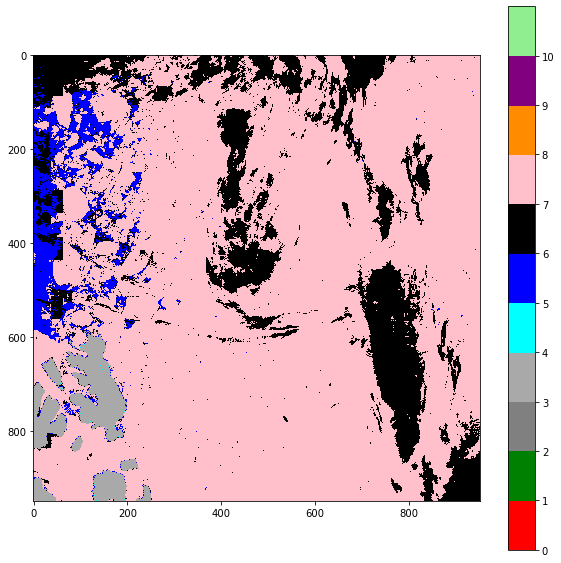

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(SIbR, cmap = cmap, norm=norm)


cbar = plt.colorbar(im)
lim = np.arange(0,11,1)
cbar.set_ticks(lim)
plt.show()

### 3. Now, let's use Cartopy to plot 

In [20]:
p0 =  [-135.0,71.7316687660085]
p1 =  [-161.565051177078, 76.4093548376422]
p2 = [-135.0, 83.9334841549555]
p3 = [-108.434948822922, 76.4093548376422]

extent = (p0,p1,p2,p3)  # extent = (left, right, lower, upper)
extent

([-135.0, 71.7316687660085],
 [-161.565051177078, 76.4093548376422],
 [-135.0, 83.9334841549555],
 [-108.434948822922, 76.4093548376422])

In [17]:
extent = (-161.565051177078, -108.434948822922, 71.7316687660085, 83.9334841549555)

In [14]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [15]:
def make_map(projection, figsize):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={"projection": projection})
    return fig, ax

IndexError: index 3615702 is out of bounds for axis 0 with size 904401

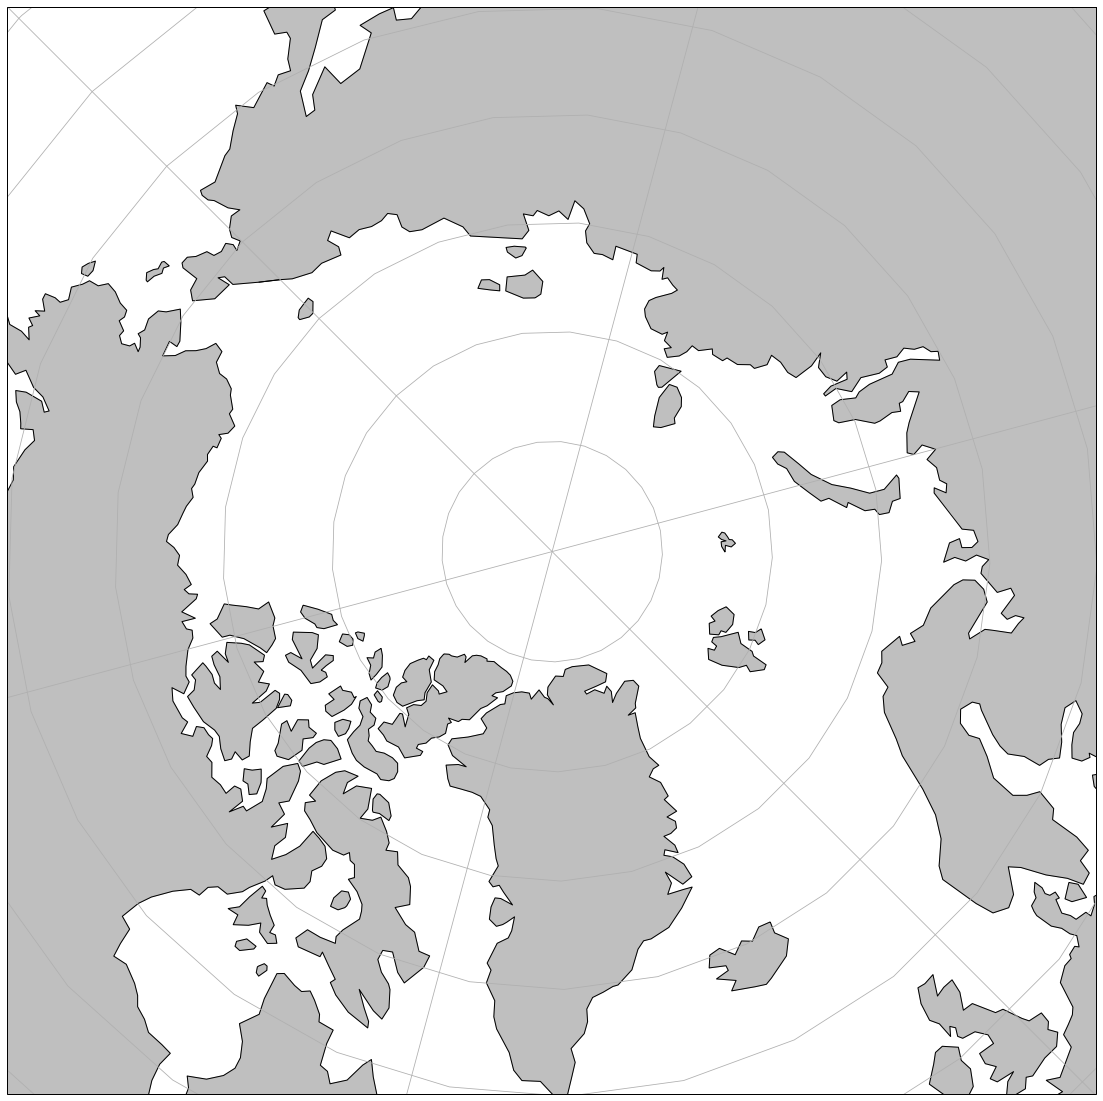

In [27]:
fig, ax = make_map(projection=ccrs.NorthPolarStereo(central_longitude = -45), figsize=(20,20))

ax.gridlines()
ax.set_extent([-179, 180, 60, 90], ccrs.PlateCarree())
ax.coastlines(resolution="110m", color="k")
ax.add_feature(cfeature.LAND, facecolor="0.75")


import scipy
tr = ndimage.rotate(SIbR,-225)
# ax.imshow(SIbR, extent = extent, cmap = cmap, norm=norm, transform = ccrs.PlateCarree()) 
ax.imshow(tr, extent = extent, cmap = cmap, norm=norm, transform = ccrs.PlateCarree()) 

In [8]:
from pydap.client import open_url
from pydap.cas.urs import setup_session

# url = 'https://urs.earthdata.nasa.gov/'
url = "https://n5eil01u.ecs.nsidc.org/MOST/MOD29P1D.006/2000.02.24/MOD29P1D.A2000055.h09v33.006.2015040204546.hdf"
session = setup_session(username = 'Kexin.Song', password = 'Kathy-mao3gou4', check_url=url)
# url2 = "https://n5eil01u.ecs.nsidc.org/MOST/MOD29P1D.006/2000.02.24/MOD29P1D.A2000055.h09v33.006.2015040204546.hdf.xml"

ds = open_url(url, session=session)
ds

HTTPError: 302 Found
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>302 Found</title>
</head><body>
<h1>Found</h1>
<p>The document has moved <a href="https://urs.earthdata.nasa.gov/oauth/authorize?client_id=_JLuwMHxb2xX6NwYTb4dRA&amp;response_type=code&amp;redirect_uri=https%3A%2F%2Fn5eil01u.ecs.nsidc.org%2FOPS%2Fredirect&amp;state=aHR0cDovL241ZWlsMDF1LmVjcy5uc2lkYy5vcmcvTU9TVC9NT0QyOVAxRC4wMDYvMjAwMC4wMi4yNC9NT0QyOVAxRC5BMjAwMDA1NS5oMDl2MzMuMDA2LjIwMTUwNDAyMDQ1NDYuaGRmLmRkcw">here</a>.</p>
</body></html>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netcdf4_pydap

credentials={'username': Kexin.Song,
             'password': Kathy-mao3gou4,
             'authentication_url':'https://urs.earthdata.nasa.gov/'}
url = ('http://goldsmr3.gesdisc.eosdis.nasa.gov:80/opendap/'
       'MERRA_MONTHLY/MAIMCPASM.5.2.0/1979/MERRA100.prod.assim.instM_3d_asm_Cp.197901.hdf')

with netcdf4_pydap.Dataset(url, **credentials) as dataset:
    data = dataset.variables['SLP'][0,:,:]
    plt.contourf(np.squeeze(data))
    plt.show()

ModuleNotFoundError: No module named 'netcdf4_pydap'

In [ ]:
url = "https://n5eil01u.ecs.nsidc.org/MOST/MOD29P1D.006/2008.07.01/MOD29P1D.A2008183.h06v13.006.2015176144528.hdf"
ds = xr.open_dataset(url)
ds